In [39]:
'''
The following code for downloading, importing and displaying the Fashion MNIST dataset is adapted
from ChatGPT, accessed February 27, 2024
'''
import numpy as np
import requests
import gzip
import os


def download_fashion_mnist(url, file_name):
    # Check if file already exists
    if not os.path.exists(file_name):
        # Download the file
        r = requests.get(url)
        with open(file_name, 'wb') as f:
            f.write(r.content)


def load_fashion_mnist(image_file, label_file):
    # Read image file
    with gzip.open(image_file, 'rb') as f:
        images = np.frombuffer(
            f.read(), np.uint8, offset=16).reshape(-1, 28, 28)

    # Read label file
    with gzip.open(label_file, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)

    return images, labels


# URLs for Fashion MNIST dataset
image_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz'
label_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz'

# File names to save the downloaded files
image_file = 'train-images-idx3-ubyte.gz'
label_file = 'train-labels-idx1-ubyte.gz'

# Download Fashion MNIST dataset
download_fashion_mnist(image_url, image_file)
download_fashion_mnist(label_url, label_file)

# Load Fashion MNIST dataset
train_images, train_labels = load_fashion_mnist(image_file, label_file)

# URLs for Fashion MNIST test dataset
test_image_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz'
test_label_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz'

# File names to save the downloaded files for test dataset
test_image_file = 't10k-images-idx3-ubyte.gz'
test_label_file = 't10k-labels-idx1-ubyte.gz'

# Download Fashion MNIST dataset
download_fashion_mnist(test_image_url, test_image_file)
download_fashion_mnist(test_label_url, test_label_file)

# Load Fashion MNIST dataset
test_images, test_labels = load_fashion_mnist(test_image_file, test_label_file)

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

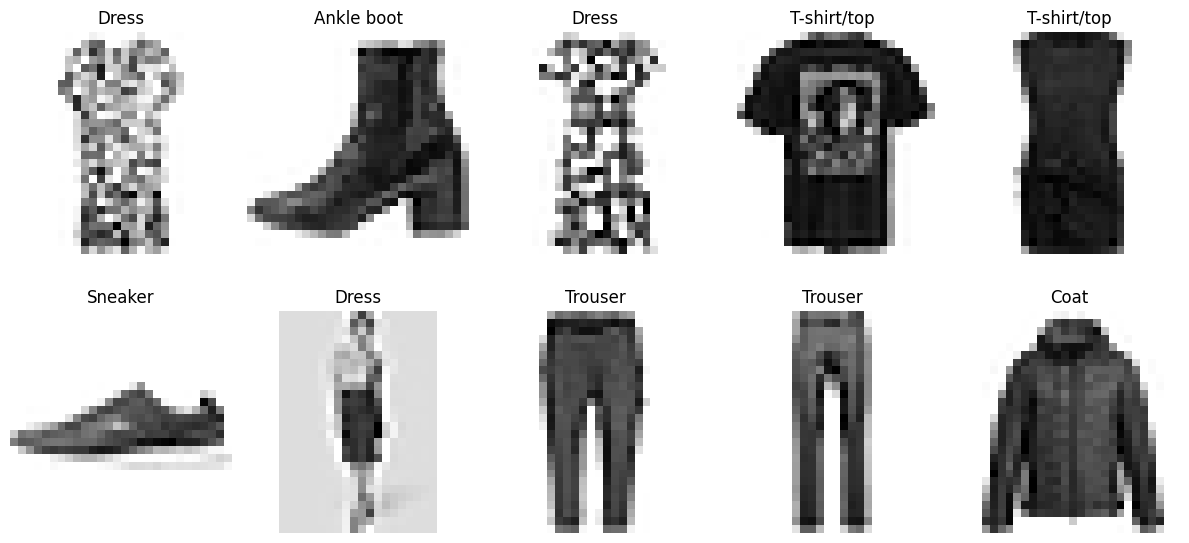

In [40]:
import matplotlib.pyplot as plt

indices = np.random.choice(range(len(train_images)), 10, replace=False)
selected_images = train_images[indices]
selected_labels = train_labels[indices]

# Plotting
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(selected_images[i], cmap=plt.cm.binary)
    axes[i].set_title(class_names[selected_labels[i]])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [12]:
def stats(labels, name):
    counts = dict()
    for label in labels:
        if label in counts:
            counts[label] += 1
        else:
            counts[label] = 1
    for category in counts:
        print(counts[category], "\"" + class_names[category] +
              "\"", "in", name, "dataset.")
    print(len(labels), "total names in", name, "dataset.\n")


stats(train_labels, "train")
stats(test_labels, "test")

6000 "Ankle boot" in train dataset.
6000 "T-shirt/top" in train dataset.
6000 "Dress" in train dataset.
6000 "Pullover" in train dataset.
6000 "Sneaker" in train dataset.
6000 "Sandal" in train dataset.
6000 "Trouser" in train dataset.
6000 "Shirt" in train dataset.
6000 "Coat" in train dataset.
6000 "Bag" in train dataset.
60000 total names in train dataset.

1000 "Ankle boot" in test dataset.
1000 "Pullover" in test dataset.
1000 "Trouser" in test dataset.
1000 "Shirt" in test dataset.
1000 "Coat" in test dataset.
1000 "Sandal" in test dataset.
1000 "Sneaker" in test dataset.
1000 "Dress" in test dataset.
1000 "Bag" in test dataset.
1000 "T-shirt/top" in test dataset.
10000 total names in test dataset.



In [13]:
def normalizeImages(images):
    numImages = images.shape[0]
    imageSize = images.shape[1] * images.shape[2]
    unraveledImages = images.reshape(numImages, imageSize)

    # Normalize each image vector
    normalized_images = np.zeros_like(unraveledImages, dtype=np.float32)
    for i in range(numImages):
        imageMean = np.mean(unraveledImages[i])
        imageSTD = np.std(unraveledImages[i])
        if imageSTD != 0:
            normalized_images[i] = (unraveledImages[i] - imageMean) / imageSTD
        else:
            normalized_images[i] = unraveledImages[i] - imageMean

    return normalized_images


normalizedTrain = normalizeImages(train_images)
normalizedTest = normalizeImages(test_images)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(normalizedTrain[:6000], train_labels[:6000])

test_sample_indices = np.random.choice(
    normalizedTest.shape[0], 25, replace=False)
test_sample_images = normalizedTest[test_sample_indices]
test_sample_labels = test_labels[test_sample_indices]

predicted_labels = knn.predict(test_sample_images)

for i, (predicted, actual) in enumerate(zip(predicted_labels, test_sample_labels)):
    correctness = "Correct" if predicted == actual else f"Wrong, correct class: {actual}"
    print(f"Sample {i+1}: Predicted class = {predicted}, {correctness}")

Sample 1: Predicted class = 4, Correct
Sample 2: Predicted class = 7, Correct
Sample 3: Predicted class = 4, Wrong, correct class: 1
Sample 4: Predicted class = 7, Correct
Sample 5: Predicted class = 5, Correct
Sample 6: Predicted class = 6, Correct
Sample 7: Predicted class = 0, Wrong, correct class: 6
Sample 8: Predicted class = 0, Correct
Sample 9: Predicted class = 3, Correct
Sample 10: Predicted class = 0, Wrong, correct class: 6
Sample 11: Predicted class = 8, Correct
Sample 12: Predicted class = 3, Correct
Sample 13: Predicted class = 8, Correct
Sample 14: Predicted class = 1, Correct
Sample 15: Predicted class = 3, Correct
Sample 16: Predicted class = 0, Correct
Sample 17: Predicted class = 6, Correct
Sample 18: Predicted class = 4, Wrong, correct class: 2
Sample 19: Predicted class = 3, Correct
Sample 20: Predicted class = 8, Correct
Sample 21: Predicted class = 3, Correct
Sample 22: Predicted class = 7, Correct
Sample 23: Predicted class = 2, Correct
Sample 24: Predicted clas

In [27]:
def compute_accuracy(pairs, numClasses):
    correct_predictions = sum(1 for i, j in pairs if i == j)
    total_predictions = len(pairs)
    return (correct_predictions / total_predictions) * 100


def compute_per_class_accuracy(pairs, numClasses):
    class_correct = np.zeros(numClasses)
    class_totals = np.zeros(numClasses)
    for i, j in pairs:
        class_totals[i] += 1
        if i == j:
            class_correct[i] += 1
    return (class_correct / class_totals) * 100


def compute_confusion_matrix(pairs, numClasses):
    matrix = np.zeros((numClasses, numClasses), dtype=int)
    for i, j in pairs:
        matrix[i][j] += 1
    return matrix

In [28]:
'''
Test code for error metrics. Leave this unchanged.
'''
test_pairs = [
    (1, 1),
    (1, 4),
    (0, 0),
    (0, 2),
    (3, 1),
    (4, 2),
    (4, 4),
    (2, 2),
    (2, 2),
    (3, 3),
    (4, 0),
    (4, 4),
    (1, 1),
    (0, 0),
    (0, 2),
    (1, 4),
    (1, 1),
    (0, 0),
    (0, 1),
    (2, 3),
]

numClasses = 5
accuracy = compute_accuracy(test_pairs, numClasses)
print(f'accuracy: {accuracy:.2f}')

per_class_accuracy = compute_per_class_accuracy(test_pairs, numClasses)
print()
print('Per class accuracy')
for i, acc in enumerate(per_class_accuracy):
    print(f'{i}: {acc:4.2f}')

cm = compute_confusion_matrix(test_pairs, numClasses)
print(f'\nConfusion matrix')
for i in range(numClasses):
    print(f'{i:2d}:', end='')
    for j in range(numClasses):
        print(f' {cm[i, j]:2d}', end='')
    print()

accuracy: 55.00

Per class accuracy
0: 50.00
1: 60.00
2: 66.67
3: 50.00
4: 50.00

Confusion matrix
 0:  3  1  2  0  0
 1:  0  3  0  0  2
 2:  0  0  2  1  0
 3:  0  1  0  1  0
 4:  1  0  1  0  2


In [31]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from joblib import Parallel, delayed

# Assuming normalizedTrain, train_labels, and compute_accuracy are defined


def train_evaluate_knn(weight, numNeigh, algo, leafSize, p_, counter, total_combinations):
    testIndices = np.random.choice(
        normalizedTrain.shape[0], 1000, replace=False)
    testImages = normalizedTrain[testIndices]
    testLabels = train_labels[testIndices]

    mask = np.ones(normalizedTrain.shape[0], dtype=bool)
    mask[testIndices] = False
    trainImages = normalizedTrain[mask]
    trainLabels = train_labels[mask]

    knn = KNeighborsClassifier(
        n_neighbors=numNeigh, weights=weight, algorithm=algo, leaf_size=leafSize, p=p_)
    knn.fit(trainImages, trainLabels)

    predictedLabels = knn.predict(testImages)
    pairs = [(predicted, actual)
             for predicted, actual in zip(predictedLabels, testLabels)]
    accuracy = compute_accuracy(pairs, 10)

    print(f"Done: {counter}/{total_combinations}")
    return weight, numNeigh, algo, leafSize, p_, accuracy


# Prepare the combinations of parameters
weights = ["uniform", "distance"]
numNeighbors = [1, 3, 5, 10]
algos = ["ball_tree", "kd_tree"]
leafSizes = [10, 20, 30, 40, 50]
ps = [1, 2]

param_combinations = [(weight, numNeigh, algo, leafSize, p_)
                      for weight in weights
                      for numNeigh in numNeighbors
                      for algo in algos
                      for leafSize in leafSizes
                      for p_ in ps]

total_combinations = len(param_combinations)

# Use joblib to parallelize the execution
num_cores = -1  # Using all available cores
results = Parallel(n_jobs=num_cores)(
    delayed(train_evaluate_knn)(*params, counter+1, total_combinations) for counter, params in enumerate(param_combinations))

# Process results (example: print or plot them)
for result in results:
    print("Parameters: ", result[:-1], "Accuracy: ", result[-1])

Done: 1/160
Done: 3/160
Done: 12/160
Done: 7/160
Done: 5/160
Done: 9/160
Done: 11/160
Done: 2/160
Done: 4/160
Done: 10/160
Done: 6/160
Done: 8/160
Done: 13/160
Done: 14/160
Done: 15/160
Done: 16/160
Done: 18/160
Done: 17/160
Done: 19/160
Done: 21/160
Done: 20/160
Done: 23/160
Done: 22/160
Done: 24/160
Done: 25/160
Done: 27/160
Done: 29/160
Done: 26/160
Done: 32/160
Done: 33/160
Done: 31/160
Done: 34/160
Done: 28/160
Done: 30/160
Done: 36/160
Done: 35/160
Done: 37/160
Done: 38/160
Done: 39/160
Done: 41/160
Done: 40/160
Done: 43/160
Done: 45/160
Done: 42/160
Done: 44/160
Done: 46/160
Done: 47/160
Done: 48/160
Done: 49/160
Done: 54/160
Done: 53/160
Done: 52/160
Done: 50/160
Done: 51/160
Done: 55/160
Done: 56/160
Done: 57/160
Done: 58/160
Done: 59/160
Done: 60/160
Done: 61/160
Done: 63/160
Done: 65/160
Done: 67/160
Done: 64/160
Done: 62/160
Done: 66/160
Done: 69/160
Done: 68/160
Done: 70/160
Done: 71/160
Done: 72/160
Done: 73/160
Done: 74/160
Done: 75/160
Done: 76/160
Done: 78/160
Done: 81

Maximum accuracy: Parameters:  ('uniform', 3, 'kd_tree', 50, 1) Accuracy:  90.0 <br>
All: <br>
Parameters:  ('uniform', 1, 'ball_tree', 10, 1) Accuracy:  84.3 <br>
Parameters:  ('uniform', 1, 'ball_tree', 10, 2) Accuracy:  88.5 <br>
Parameters:  ('uniform', 1, 'ball_tree', 20, 1) Accuracy:  86.9 <br>
Parameters:  ('uniform', 1, 'ball_tree', 20, 2) Accuracy:  86.6 <br>
Parameters:  ('uniform', 1, 'ball_tree', 30, 1) Accuracy:  87.5 <br>
Parameters:  ('uniform', 1, 'ball_tree', 30, 2) Accuracy:  86.8 <br>
Parameters:  ('uniform', 1, 'ball_tree', 40, 1) Accuracy:  85.0 <br>
Parameters:  ('uniform', 1, 'ball_tree', 40, 2) Accuracy:  87.2 <br>
Parameters:  ('uniform', 1, 'ball_tree', 50, 1) Accuracy:  86.6 <br>
Parameters:  ('uniform', 1, 'ball_tree', 50, 2) Accuracy:  86.9 <br>
Parameters:  ('uniform', 1, 'kd_tree', 10, 1) Accuracy:  86.1 <br>
Parameters:  ('uniform', 1, 'kd_tree', 10, 2) Accuracy:  87.7 <br>
Parameters:  ('uniform', 1, 'kd_tree', 20, 1) Accuracy:  86.5 <br>
Parameters:  ('uniform', 1, 'kd_tree', 20, 2) Accuracy:  86.3 <br>
Parameters:  ('uniform', 1, 'kd_tree', 30, 1) Accuracy:  88.0 <br>
Parameters:  ('uniform', 1, 'kd_tree', 30, 2) Accuracy:  87.3 <br>
Parameters:  ('uniform', 1, 'kd_tree', 40, 1) Accuracy:  87.9 <br>
Parameters:  ('uniform', 1, 'kd_tree', 40, 2) Accuracy:  88.1 <br>
Parameters:  ('uniform', 1, 'kd_tree', 50, 1) Accuracy:  86.5 <br>
Parameters:  ('uniform', 1, 'kd_tree', 50, 2) Accuracy:  86.3 <br>
Parameters:  ('uniform', 3, 'ball_tree', 10, 1) Accuracy:  87.3 <br>
Parameters:  ('uniform', 3, 'ball_tree', 10, 2) Accuracy:  85.5 <br>
Parameters:  ('uniform', 3, 'ball_tree', 20, 1) Accuracy:  86.7 <br>
Parameters:  ('uniform', 3, 'ball_tree', 20, 2) Accuracy:  86.8 <br>
Parameters:  ('uniform', 3, 'ball_tree', 30, 1) Accuracy:  86.6 <br>
Parameters:  ('uniform', 3, 'ball_tree', 30, 2) Accuracy:  85.9 <br>
Parameters:  ('uniform', 3, 'ball_tree', 40, 1) Accuracy:  88.0 <br>
Parameters:  ('uniform', 3, 'ball_tree', 40, 2) Accuracy:  84.89999999999999 <br>
Parameters:  ('uniform', 3, 'ball_tree', 50, 1) Accuracy:  87.7 <br>
Parameters:  ('uniform', 3, 'ball_tree', 50, 2) Accuracy:  87.8 <br>
Parameters:  ('uniform', 3, 'kd_tree', 10, 1) Accuracy:  86.8 <br>
Parameters:  ('uniform', 3, 'kd_tree', 10, 2) Accuracy:  87.1 <br>
Parameters:  ('uniform', 3, 'kd_tree', 20, 1) Accuracy:  86.4 <br>
Parameters:  ('uniform', 3, 'kd_tree', 20, 2) Accuracy:  86.8 <br>
Parameters:  ('uniform', 3, 'kd_tree', 30, 1) Accuracy:  87.7 <br>
Parameters:  ('uniform', 3, 'kd_tree', 30, 2) Accuracy:  86.8 <br>
Parameters:  ('uniform', 3, 'kd_tree', 40, 1) Accuracy:  86.4 <br>
Parameters:  ('uniform', 3, 'kd_tree', 40, 2) Accuracy:  86.5 <br>
Parameters:  ('uniform', 3, 'kd_tree', 50, 1) Accuracy:  90.0 <br>
Parameters:  ('uniform', 3, 'kd_tree', 50, 2) Accuracy:  86.4 <br>
Parameters:  ('uniform', 5, 'ball_tree', 10, 1) Accuracy:  88.8 <br>
Parameters:  ('uniform', 5, 'ball_tree', 10, 2) Accuracy:  87.0 <br>
Parameters:  ('uniform', 5, 'ball_tree', 20, 1) Accuracy:  85.8 <br>
Parameters:  ('uniform', 5, 'ball_tree', 20, 2) Accuracy:  84.39999999999999 <br>
Parameters:  ('uniform', 5, 'ball_tree', 30, 1) Accuracy:  87.7 <br>
Parameters:  ('uniform', 5, 'ball_tree', 30, 2) Accuracy:  85.2 <br>
Parameters:  ('uniform', 5, 'ball_tree', 40, 1) Accuracy:  86.4 <br>
Parameters:  ('uniform', 5, 'ball_tree', 40, 2) Accuracy:  86.7 <br>
Parameters:  ('uniform', 5, 'ball_tree', 50, 1) Accuracy:  86.7 <br>
Parameters:  ('uniform', 5, 'ball_tree', 50, 2) Accuracy:  84.89999999999999 <br>
Parameters:  ('uniform', 5, 'kd_tree', 10, 1) Accuracy:  87.6 <br>
Parameters:  ('uniform', 5, 'kd_tree', 10, 2) Accuracy:  88.2 <br>
Parameters:  ('uniform', 5, 'kd_tree', 20, 1) Accuracy:  88.4 <br>
Parameters:  ('uniform', 5, 'kd_tree', 20, 2) Accuracy:  85.1 <br>
Parameters:  ('uniform', 5, 'kd_tree', 30, 1) Accuracy:  86.9 <br>
Parameters:  ('uniform', 5, 'kd_tree', 30, 2) Accuracy:  86.3 <br>
Parameters:  ('uniform', 5, 'kd_tree', 40, 1) Accuracy:  86.9 <br>
Parameters:  ('uniform', 5, 'kd_tree', 40, 2) Accuracy:  87.0 <br>
Parameters:  ('uniform', 5, 'kd_tree', 50, 1) Accuracy:  86.5 <br>
Parameters:  ('uniform', 5, 'kd_tree', 50, 2) Accuracy:  86.0 <br>
Parameters:  ('uniform', 10, 'ball_tree', 10, 1) Accuracy:  87.9 <br>
Parameters:  ('uniform', 10, 'ball_tree', 10, 2) Accuracy:  87.0 <br>
Parameters:  ('uniform', 10, 'ball_tree', 20, 1) Accuracy:  87.2 <br>
Parameters:  ('uniform', 10, 'ball_tree', 20, 2) Accuracy:  87.0 <br>
Parameters:  ('uniform', 10, 'ball_tree', 30, 1) Accuracy:  85.8 <br>
Parameters:  ('uniform', 10, 'ball_tree', 30, 2) Accuracy:  84.2 <br>
Parameters:  ('uniform', 10, 'ball_tree', 40, 1) Accuracy:  86.4 <br>
Parameters:  ('uniform', 10, 'ball_tree', 40, 2) Accuracy:  85.6 <br>
Parameters:  ('uniform', 10, 'ball_tree', 50, 1) Accuracy:  86.0 <br>
Parameters:  ('uniform', 10, 'ball_tree', 50, 2) Accuracy:  88.5 <br>
Parameters:  ('uniform', 10, 'kd_tree', 10, 1) Accuracy:  86.2 <br>
Parameters:  ('uniform', 10, 'kd_tree', 10, 2) Accuracy:  87.6 <br>
Parameters:  ('uniform', 10, 'kd_tree', 20, 1) Accuracy:  86.3 <br>
Parameters:  ('uniform', 10, 'kd_tree', 20, 2) Accuracy:  86.5 <br>
Parameters:  ('uniform', 10, 'kd_tree', 30, 1) Accuracy:  86.7 <br>
Parameters:  ('uniform', 10, 'kd_tree', 30, 2) Accuracy:  85.1 <br>
Parameters:  ('uniform', 10, 'kd_tree', 40, 1) Accuracy:  85.5 <br>
Parameters:  ('uniform', 10, 'kd_tree', 40, 2) Accuracy:  86.1 <br>
Parameters:  ('uniform', 10, 'kd_tree', 50, 1) Accuracy:  87.8 <br>
Parameters:  ('uniform', 10, 'kd_tree', 50, 2) Accuracy:  85.7 <br>
Parameters:  ('distance', 1, 'ball_tree', 10, 1) Accuracy:  87.9 <br>
Parameters:  ('distance', 1, 'ball_tree', 10, 2) Accuracy:  85.8 <br>
Parameters:  ('distance', 1, 'ball_tree', 20, 1) Accuracy:  87.2 <br>
Parameters:  ('distance', 1, 'ball_tree', 20, 2) Accuracy:  86.4 <br>
Parameters:  ('distance', 1, 'ball_tree', 30, 1) Accuracy:  86.9 <br>
Parameters:  ('distance', 1, 'ball_tree', 30, 2) Accuracy:  87.8 <br>
Parameters:  ('distance', 1, 'ball_tree', 40, 1) Accuracy:  85.3 <br>
Parameters:  ('distance', 1, 'ball_tree', 40, 2) Accuracy:  87.6 <br>
Parameters:  ('distance', 1, 'ball_tree', 50, 1) Accuracy:  85.5 <br>
Parameters:  ('distance', 1, 'ball_tree', 50, 2) Accuracy:  83.8 <br>
Parameters:  ('distance', 1, 'kd_tree', 10, 1) Accuracy:  86.6 <br>
Parameters:  ('distance', 1, 'kd_tree', 10, 2) Accuracy:  86.8 <br>
Parameters:  ('distance', 1, 'kd_tree', 20, 1) Accuracy:  87.2 <br>
Parameters:  ('distance', 1, 'kd_tree', 20, 2) Accuracy:  87.8 <br>
Parameters:  ('distance', 1, 'kd_tree', 30, 1) Accuracy:  85.7 <br>
Parameters:  ('distance', 1, 'kd_tree', 30, 2) Accuracy:  85.9 <br>
Parameters:  ('distance', 1, 'kd_tree', 40, 1) Accuracy:  84.89999999999999 <br>
Parameters:  ('distance', 1, 'kd_tree', 40, 2) Accuracy:  85.39999999999999 <br>
Parameters:  ('distance', 1, 'kd_tree', 50, 1) Accuracy:  85.5 <br>
Parameters:  ('distance', 1, 'kd_tree', 50, 2) Accuracy:  84.5 <br>
Parameters:  ('distance', 3, 'ball_tree', 10, 1) Accuracy:  85.2 <br>
Parameters:  ('distance', 3, 'ball_tree', 10, 2) Accuracy:  87.4 <br>
Parameters:  ('distance', 3, 'ball_tree', 20, 1) Accuracy:  88.3 <br>
Parameters:  ('distance', 3, 'ball_tree', 20, 2) Accuracy:  84.5 <br>
Parameters:  ('distance', 3, 'ball_tree', 30, 1) Accuracy:  85.9 <br>
Parameters:  ('distance', 3, 'ball_tree', 30, 2) Accuracy:  87.7 <br>
Parameters:  ('distance', 3, 'ball_tree', 40, 1) Accuracy:  86.2 <br>
Parameters:  ('distance', 3, 'ball_tree', 40, 2) Accuracy:  88.1 <br>
Parameters:  ('distance', 3, 'ball_tree', 50, 1) Accuracy:  87.1 <br>
Parameters:  ('distance', 3, 'ball_tree', 50, 2) Accuracy:  87.6 <br>
Parameters:  ('distance', 3, 'kd_tree', 10, 1) Accuracy:  86.4 <br>
Parameters:  ('distance', 3, 'kd_tree', 10, 2) Accuracy:  83.89999999999999 <br>
Parameters:  ('distance', 3, 'kd_tree', 20, 1) Accuracy:  86.9 <br>
Parameters:  ('distance', 3, 'kd_tree', 20, 2) Accuracy:  88.0 <br>
Parameters:  ('distance', 3, 'kd_tree', 30, 1) Accuracy:  85.5 <br>
Parameters:  ('distance', 3, 'kd_tree', 30, 2) Accuracy:  86.9 <br>
Parameters:  ('distance', 3, 'kd_tree', 40, 1) Accuracy:  87.1 <br>
Parameters:  ('distance', 3, 'kd_tree', 40, 2) Accuracy:  86.6 <br>
Parameters:  ('distance', 3, 'kd_tree', 50, 1) Accuracy:  88.4 <br>
Parameters:  ('distance', 3, 'kd_tree', 50, 2) Accuracy:  86.1 <br>
Parameters:  ('distance', 5, 'ball_tree', 10, 1) Accuracy:  86.8 <br>
Parameters:  ('distance', 5, 'ball_tree', 10, 2) Accuracy:  87.1 <br>
Parameters:  ('distance', 5, 'ball_tree', 20, 1) Accuracy:  85.7 <br>
Parameters:  ('distance', 5, 'ball_tree', 20, 2) Accuracy:  84.39999999999999 <br>
Parameters:  ('distance', 5, 'ball_tree', 30, 1) Accuracy:  87.6 <br>
Parameters:  ('distance', 5, 'ball_tree', 30, 2) Accuracy:  84.39999999999999 <br>
Parameters:  ('distance', 5, 'ball_tree', 40, 1) Accuracy:  86.6 <br>
Parameters:  ('distance', 5, 'ball_tree', 40, 2) Accuracy:  88.5 <br>
Parameters:  ('distance', 5, 'ball_tree', 50, 1) Accuracy:  86.9 <br>
Parameters:  ('distance', 5, 'ball_tree', 50, 2) Accuracy:  86.1 <br>
Parameters:  ('distance', 5, 'kd_tree', 10, 1) Accuracy:  87.9 <br>
Parameters:  ('distance', 5, 'kd_tree', 10, 2) Accuracy:  87.5 <br>
Parameters:  ('distance', 5, 'kd_tree', 20, 1) Accuracy:  87.8 <br>
Parameters:  ('distance', 5, 'kd_tree', 20, 2) Accuracy:  88.3 <br>
Parameters:  ('distance', 5, 'kd_tree', 30, 1) Accuracy:  89.2 <br>
Parameters:  ('distance', 5, 'kd_tree', 30, 2) Accuracy:  87.0 <br>
Parameters:  ('distance', 5, 'kd_tree', 40, 1) Accuracy:  87.7 <br>
Parameters:  ('distance', 5, 'kd_tree', 40, 2) Accuracy:  84.89999999999999 <br>
Parameters:  ('distance', 5, 'kd_tree', 50, 1) Accuracy:  88.3 <br>
Parameters:  ('distance', 5, 'kd_tree', 50, 2) Accuracy:  86.8 <br>
Parameters:  ('distance', 10, 'ball_tree', 10, 1) Accuracy:  86.4 <br>
Parameters:  ('distance', 10, 'ball_tree', 10, 2) Accuracy:  85.9 <br>
Parameters:  ('distance', 10, 'ball_tree', 20, 1) Accuracy:  88.1 <br>
Parameters:  ('distance', 10, 'ball_tree', 20, 2) Accuracy:  85.6 <br>
Parameters:  ('distance', 10, 'ball_tree', 30, 1) Accuracy:  88.9 <br>
Parameters:  ('distance', 10, 'ball_tree', 30, 2) Accuracy:  87.5 <br>
Parameters:  ('distance', 10, 'ball_tree', 40, 1) Accuracy:  88.4 <br>
Parameters:  ('distance', 10, 'ball_tree', 40, 2) Accuracy:  86.9 <br>
Parameters:  ('distance', 10, 'ball_tree', 50, 1) Accuracy:  88.1 <br>
Parameters:  ('distance', 10, 'ball_tree', 50, 2) Accuracy:  86.0 <br>
Parameters:  ('distance', 10, 'kd_tree', 10, 1) Accuracy:  85.2 <br>
Parameters:  ('distance', 10, 'kd_tree', 10, 2) Accuracy:  83.39999999999999 <br>
Parameters:  ('distance', 10, 'kd_tree', 20, 1) Accuracy:  87.6 <br>
Parameters:  ('distance', 10, 'kd_tree', 20, 2) Accuracy:  85.5 <br>
Parameters:  ('distance', 10, 'kd_tree', 30, 1) Accuracy:  86.6 <br>
Parameters:  ('distance', 10, 'kd_tree', 30, 2) Accuracy:  86.3 <br>
Parameters:  ('distance', 10, 'kd_tree', 40, 1) Accuracy:  87.7 <br>
Parameters:  ('distance', 10, 'kd_tree', 40, 2) Accuracy:  87.0 <br>
Parameters:  ('distance', 10, 'kd_tree', 50, 1) Accuracy:  86.6 <br>
Parameters:  ('distance', 10, 'kd_tree', 50, 2) Accuracy:  88.3 <br>



In [35]:
params = ('uniform', 3, 'kd_tree', 50, 1)
knn = KNeighborsClassifier(
    weights=params[0], n_neighbors=params[1], algorithm=params[2], leaf_size=params[3], p=params[4])
knn.fit(normalizedTrain, train_labels)

predictedLabels = knn.predict(normalizedTest)
pairs = [(predicted, actual)
         for predicted, actual in zip(predictedLabels, test_labels)]

numClasses = 10
accuracy = compute_accuracy(pairs, numClasses)
print(f'accuracy: {accuracy:.2f}')

perClassAccuracy = compute_per_class_accuracy(pairs, numClasses)
print()
print('Per class accuracy')
for i, acc in enumerate(perClassAccuracy):
    print(f'{i}: {acc:4.2f}')

cm = compute_confusion_matrix(pairs, numClasses)
print(f'\nConfusion matrix')
for i in range(numClasses):
    print(f'{i:2d}:', end='')
    for j in range(numClasses):
        print(f' {cm[i, j]:2d}', end='')
    print()

accuracy: 86.50

Per class accuracy
0: 76.64
1: 97.79
2: 72.86
3: 91.28
4: 76.82
5: 99.56
6: 70.31
7: 91.31
8: 97.07
9: 92.08

Confusion matrix
 0: 863  7 22 38  4  0 188  0  3  1
 1:  4 974  1 12  0  0  2  0  3  0
 2: 19  0 800 17 138  0 116  0  8  0
 3: 19 11  6 869 20  0 23  0  4  0
 4:  3  3 92 46 779  0 87  0  4  0
 5:  0  0  0  0  0 911  0  3  0  1
 6: 84  4 78 14 55  0 573  0  7  0
 7:  1  0  0  0  0 49  0 956  8 33
 8:  7  1  1  4  4  1 11  0 960  0
 9:  0  0  0  0  0 39  0 41  3 965


The hyper parameters that I determined to be the best from my analysis were the following: ('uniform', 3, 'kd_tree', 50, 1) Accuracy:  90.0 <br>

This resulted in an accuracy 86.5% when conducting the final test. the easiest type of clothing to correctly recognize is label 5 at 99.56% accuracy and the hardest is label 6 at 70.31% accuracy. 

The most common confusion the classifier made was confusing label 0 for label 6. This occurred 188 times in the final test case.

The most impactful hyper paramter was p, however it only has two options and can thus skew the mean calculation. A parameter that has more data points and has a high variance is leaf size. Testing 5 options showed that it was the second most impactful variable. 

Variance by Weight: 0.00032851562500043274
Variance by Leaf Size: 0.012704296874999112
Variance by Algorithm: 0.0030941406250006957
Variance by N Neighbors: 0.0009648437500004298
Variance by P: 0.05610976562500566


In [42]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from joblib import Parallel, delayed


def train_evaluate_knn_pca(weight, numNeigh, algo, leafSize, p_, pca_components, counter, total_combinations):
    testIndices = np.random.choice(
        normalizedTrain.shape[0], 1000, replace=False)
    testImages = normalizedTrain[testIndices]
    testLabels = train_labels[testIndices]

    mask = np.ones(normalizedTrain.shape[0], dtype=bool)
    mask[testIndices] = False
    trainImages = normalizedTrain[mask]
    trainLabels = train_labels[mask]

    pca = PCA(n_components=pca_components)
    pca.fit(trainImages)
    trainImages_pca = pca.transform(trainImages)
    testImages_pca = pca.transform(testImages)

    knn = KNeighborsClassifier(
        n_neighbors=numNeigh, weights=weight, algorithm=algo, leaf_size=leafSize, p=p_)
    knn.fit(trainImages_pca, trainLabels)

    predictedLabels = knn.predict(testImages_pca)
    pairs = [(predicted, actual)
             for predicted, actual in zip(predictedLabels, testLabels)]
    accuracy = compute_accuracy(pairs, 10)

    print(f"Done: {counter}/{total_combinations}")
    return weight, numNeigh, algo, leafSize, p_, pca_components, accuracy


weights = ["uniform", "distance"]
numNeighbors = [1, 3, 5, 10]
algos = ["ball_tree", "kd_tree"]
leafSizes = [10, 20, 30, 40, 50]
ps = [1, 2]
pca_components_list = [60, 80, 100, 120, 140]

param_combinations = [(weight, numNeigh, algo, leafSize, p_, pca_components)
                      for weight in weights
                      for numNeigh in numNeighbors
                      for algo in algos
                      for leafSize in leafSizes
                      for p_ in ps
                      for pca_components in pca_components_list]

total_combinations = len(param_combinations)

# Parallel execution
num_cores = -1  # -1 is all cores
results = Parallel(n_jobs=num_cores)(
    delayed(train_evaluate_knn_pca)(*params, counter+1, total_combinations) for counter, params in enumerate(param_combinations))

# Process and display results
for result in results:
    print("Parameters: ", result[:-1], "Accuracy: ", result[-1])

Done: 6/800
Done: 7/800
Done: 8/800
Done: 1/800
Done: 11/800
Done: 9/800


/Users/joshmoskoff/anaconda3/envs/2024/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Done: 2/800
Done: 12/800
Done: 10/800
Done: 3/800
Done: 16/800
Done: 4/800
Done: 17/800
Done: 13/800
Done: 18/800
Done: 5/800
Done: 19/800
Done: 21/800
Done: 20/800
Done: 14/800
Done: 22/800
Done: 26/800
Done: 27/800
Done: 15/800
Done: 23/800
Done: 28/800
Done: 29/800
Done: 31/800
Done: 24/800
Done: 36/800
Done: 30/800
Done: 32/800
Done: 37/800
Done: 25/800
Done: 38/800
Done: 33/800
Done: 34/800
Done: 46/800
Done: 41/800
Done: 39/800
Done: 42/800
Done: 35/800
Done: 47/800
Done: 40/800
Done: 48/800
Done: 43/800
Done: 51/800
Done: 56/800
Done: 44/800
Done: 57/800
Done: 52/800
Done: 58/800
Done: 49/800
Done: 59/800
Done: 60/800
Done: 45/800
Done: 50/800
Done: 66/800
Done: 53/800
Done: 61/800
Done: 67/800
Done: 68/800
Done: 69/800
Done: 62/800
Done: 54/800
Done: 70/800
Done: 55/800
Done: 71/800
Done: 76/800
Done: 77/800
Done: 63/800
Done: 72/800
Done: 64/800
Done: 78/800
Done: 79/800
Done: 73/800
Done: 80/800
Done: 81/800
Done: 86/800
Done: 65/800
Done: 87/800
Done: 82/800
Done: 74/800
Don

There were three combinations of parameters tied for the highest value of 89.9% accuracy. these are 
('uniform', 5, 'ball_tree', 20, 2, 120) <br>
('distance', 3, 'ball_tree', 40, 2, 100) <br>
('distance', 5, 'kd_tree', 20, 2, 140) <br>

In [43]:
def finalPCA(weight, numNeigh, algo, leafSize, p_, pca_components):
    testImages = normalizedTest
    testLabels = test_labels

    trainImages = normalizedTrain
    trainLabels = train_labels

    pca = PCA(n_components=pca_components)
    pca.fit(trainImages)
    trainImages_pca = pca.transform(trainImages)
    testImages_pca = pca.transform(testImages)

    knn = KNeighborsClassifier(
        n_neighbors=numNeigh, weights=weight, algorithm=algo, leaf_size=leafSize, p=p_)
    knn.fit(trainImages_pca, trainLabels)

    predictedLabels = knn.predict(testImages_pca)
    pairs = [(predicted, actual)
             for predicted, actual in zip(predictedLabels, testLabels)]
    accuracy = compute_accuracy(pairs, 10)
    perClass = compute_per_class_accuracy(pairs, 10)
    confusion = compute_confusion_matrix(pairs, 10)

    return accuracy, perClass, confusion


# 89.9% accuracy on previous test with the following parameters
accuracy, perClass, confusion = finalPCA(
    'distance', 3, 'ball_tree', 40, 2, 100)

print(f'accuracy: {accuracy:.2f}')
print()

print('Per class accuracy')
for i, acc in enumerate(perClassAccuracy):
    print(f'{i}: {acc:4.2f}')

print(f'\nConfusion matrix')
for i in range(numClasses):
    print(f'{i:2d}:', end='')
    for j in range(numClasses):
        print(f' {cm[i, j]:2d}', end='')
    print()

accuracy: 87.19

Per class accuracy
0: 76.64
1: 97.79
2: 72.86
3: 91.28
4: 76.82
5: 99.56
6: 70.31
7: 91.31
8: 97.07
9: 92.08

Confusion matrix
 0: 863  7 22 38  4  0 188  0  3  1
 1:  4 974  1 12  0  0  2  0  3  0
 2: 19  0 800 17 138  0 116  0  8  0
 3: 19 11  6 869 20  0 23  0  4  0
 4:  3  3 92 46 779  0 87  0  4  0
 5:  0  0  0  0  0 911  0  3  0  1
 6: 84  4 78 14 55  0 573  0  7  0
 7:  1  0  0  0  0 49  0 956  8 33
 8:  7  1  1  4  4  1 11  0 960  0
 9:  0  0  0  0  0 39  0 41  3 965
